# Machine learning para detecção de fraudes de cartões de crédito
Neste notebook, usamos o modelo de regressão logística para classificar se transações são fraude ou não.
Além disso, por se tratar de uma base desbalanceada - no caso, com uma proporção muito maior de transações não-fraudulentas, utlizamos o algoritmo de under-sampling para balancear o dataset.

## Importação da base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/BasesDeDados/Grupo_IA/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Situação da base de dados

In [ ]:
x = df.drop(['Class'], axis=1)
y = df['Class']

In [ ]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: ylabel='Class'>

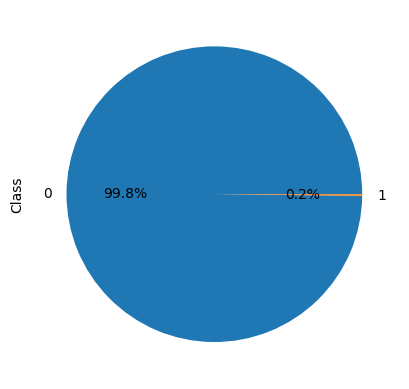

In [ ]:
y.value_counts().plot(kind='pie', autopct='%1.1f%%')

Aqui constatamos que realmente há uma proporção maior de transações não-fraudulentas.

In [ ]:
y.value_counts()/y.shape[0]*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

## Regressão logística com o dataset desbalanceado

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()/y_train.shape[0]*100

0    99.827062
1     0.172938
Name: Class, dtype: float64

In [ ]:
y_test.value_counts()/y_test.shape[0]*100

0    99.827636
1     0.172364
Name: Class, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0, max_iter=1000)

In [ ]:
clf = clf.fit(x_train, y_train)

In [ ]:
y_pred = clf.predict(x_test)

## Métricas no dataset desbalanceado

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.9990849798376371

In [ ]:
confusion_matrix(y_test, y_pred)

array([[93806,    19],
       [   67,    95]])

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
rec1 = recall_score(y_test, y_pred)
rec1

0.5864197530864198

## Comparação com o dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x, y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(x)
dummy_clf.score(x, y)

0.9982725143693799

A conclusão é que, como o dataset tem uma proporção maior de transações não-fraudulentas, classificar aleatoriamente as transações tem a mesma performance do modelo de regressão logística.

## Balanceando o dataset
Aqui, usamos o algoritmo de under-sampling, o qual diminui os registro da classe majoritária para a mesma quantidade de registros da classe minoritária.

In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=42)

In [ ]:
x_rus, y_rus = rus.fit_resample(x, y)

<Axes: ylabel='Class'>

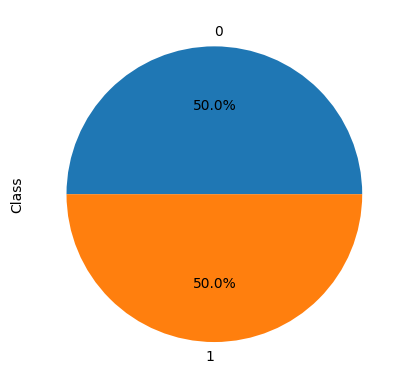

In [ ]:
y_rus.value_counts().plot(kind='pie', autopct='%1.1f%%')

In [ ]:
clf = LogisticRegression(random_state=0, max_iter=1000)
clf = clf.fit(x_rus, y_rus)
y_pred = clf.predict(x_test)

In [ ]:
rec2 = recall_score(y_test, y_pred)
rec2

0.8765432098765432

In [ ]:
melhora = (rec2-rec1)/rec1
melhora

0.49473684210526303

## Adicionando o threshold

In [ ]:
y_probs = clf.predict_proba(x_test)[:, 1]

In [ ]:
threshold = 0.3
y_pred = [1 if p > threshold else 0 for p in y_probs]

In [ ]:
rec3 = recall_score(y_test, y_pred)
rec3

0.9012345679012346

In [ ]:
melhora = (rec3-rec1)/rec1
melhora

0.5368421052631578

## Conclusões
Tivemos uma melhora na classificação de falso positivo do modelo desbalanceado para o balanceado de quase 50% sem o threshold, e de mais de 50% com o threshold.
O modelo de classificação aleatória ainda perfoma melhor, porém, considerando que uma classificação incorreta de uma transação fraudulenta é muito danosa para uma empresa, o modelo de regressão logística com dataset balanceado é muito mais valioso.

## Referências
- Base de daddos: [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- Modelo de regressão logística: [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- Algoritmo de under-sampling: [Imbalanced-learn](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)